In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data.csv')

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['AEP_MW'].values.reshape(-1, 1))

In [8]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [9]:
def parsing_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [10]:
time_step = 168
X_train, y_train = parsing_dataset(train_data, time_step)
X_test, y_test = parsing_dataset(test_data, time_step)

In [11]:
len(X_test) , len(y_test)

(23649, 23649)

In [7]:
model = Sequential() #DEEP LEARNİNG MODELİ
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1))) #İLK HIDDEN LAYER
model.add(LSTM(units=50)) #İKİNCİ HIDDEN LAYER
model.add(Dense(units=1)) #OUTPUT LAYER
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\duruc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM TRAİN KISMI

In [8]:
_model = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 0.0034
Epoch 2/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 3.6773e-04
Epoch 3/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 2.5753e-04
Epoch 4/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 2.3048e-04
Epoch 5/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 2.0440e-04
Epoch 6/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 1.8545e-04
Epoch 7/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 1.7978e-04
Epoch 8/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 1.5758e-04
Epoch 9/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 1.5243e-04
Epoch 10/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 1.4337e-04
Epoch 11/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 1.3685e-04
Epoch 12/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 1.3029e-04
Epoch 13/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 1.2177e-04
Epoch 14/100
6063/6063 ━━

In [2]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

NameError: name 'model' is not defined

In [22]:
last_week_predictions = predictions[-168:]  #Train ettiğim datasının son bir haftalık kısmı.
last_week_actual = df['AEP_MW'].values[-169:-1]  #Test Datasının son bir haftalık kısmı.

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

plt.plot(df[-168:]['Datetime'], last_week_actual, label='Gerçek Veri') #GERÇEK VERİ
plt.plot(df[-168:]['Datetime'], last_week_predictions, label='Tahmin Sonuçları') #EĞİTİLMİŞ MODELİN SONUÇLARI

#X ekseninde 1 haftalık datayı günlere bölme işlemi
step = 24
x_ticks = df[-168:]['Datetime'][::step]
plt.xticks(ticks=x_ticks, labels=x_ticks) 

plt.xlabel('Zaman')
plt.ylabel('MWH')
plt.title('SHORT TERM ENERGY CONSUMPTION FORECASTİNG')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

<Figure size 1400x700 with 0 Axes>

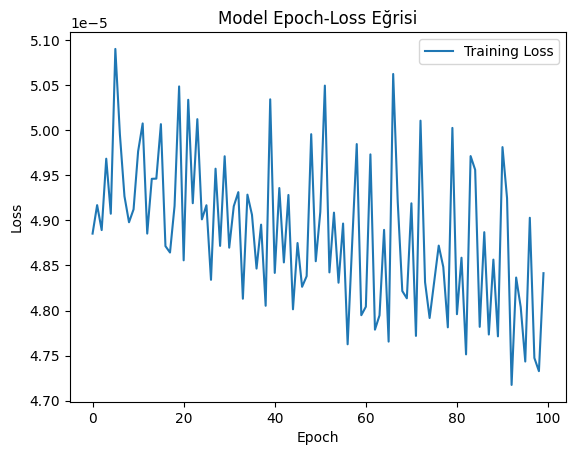

In [26]:
plt.plot(_model.history['loss'], label='Training Loss')
plt.title('Model Epoch-Loss Eğrisi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
batch_sizes = [16, 32, 64, 128]
_model_dict = {}
for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    _model = model.fit(X_train, y_train, epochs=100, batch_size=batch_size)
    _model_dict[batch_size] = _model.history

Training with batch size: 16
Epoch 1/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - loss: 0.0035
Epoch 2/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - loss: 3.5282e-04
Epoch 3/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - loss: 2.4609e-04
Epoch 4/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - loss: 2.1200e-04
Epoch 5/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - loss: 1.9000e-04
Epoch 6/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 1.7898e-04
Epoch 7/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - loss: 1.6678e-04
Epoch 8/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - loss: 1.6695e-04
Epoch 9/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 1.5247e-04
Epoch 10/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 1.4492e-04
Epoch 11/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - loss: 1.3936e-04
Epoch 12/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - loss: 1.3732e-04
Epoch 13/100
6063/6063 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - loss: 1.2610e

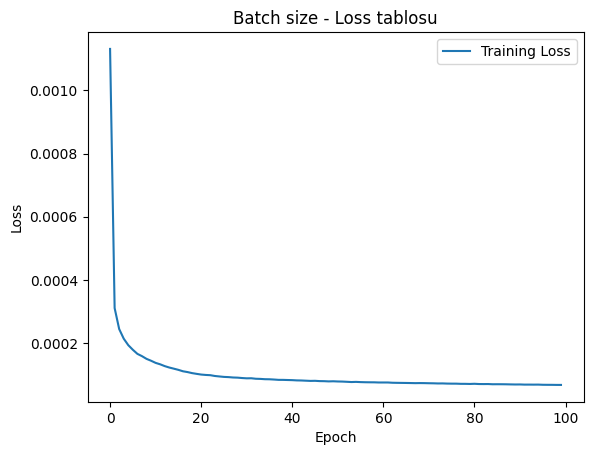

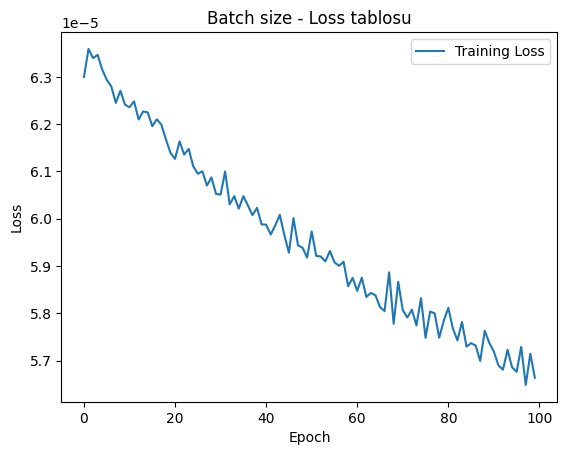

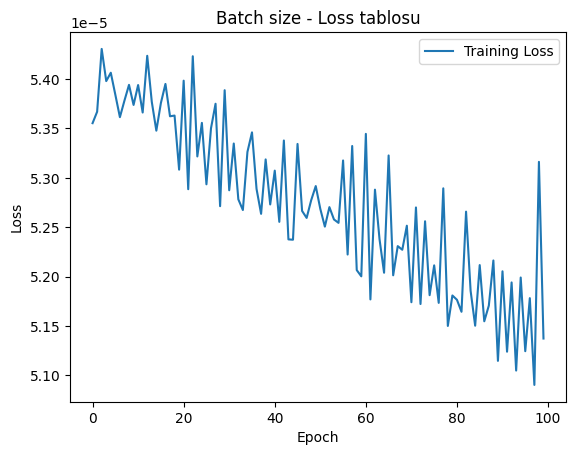

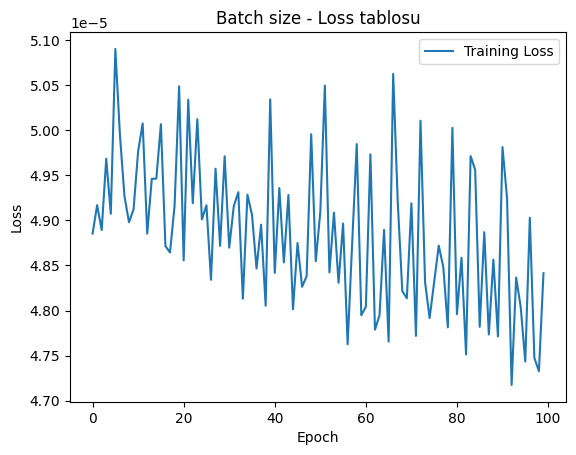

In [17]:
for batch_size in batch_sizes:
    plt.plot(_model_dict[batch_size]['loss'], label='Training Loss')
    plt.title('Batch size - Loss tablosu')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()